# Shell

In [1]:
# Installing packages
!pip install hdbscan sentence-transformers --quiet

# Importing the transformer
from sentence_transformers import SentenceTransformer

# Basic imports
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import scipy as sc
import requests
import torch
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from sklearn.cluster import KMeans
from bs4 import BeautifulSoup
from sklearn.manifold import TSNE
from keybert import KeyBERT
from sklearn.decomposition import PCA   

# Special imports for plots
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
from sklearn.linear_model import LinearRegression

# Imports for the widgets
from ipywidgets import widgets, interact
from IPython.display import display, clear_output

#Imports for decrypting urls to pdfs or html
from urllib.parse import urljoin
import re
import requests
import PyPDF2
from bs4 import BeautifulSoup
from Crypto.Cipher import AES
from Crypto.Random import get_random_bytes

DEPRECATION: Loading egg at /opt/anaconda3/envs/embed/lib/python3.12/site-packages/sacremoses-0.0.43-py3.8.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


/opt/anaconda3/envs/embed/lib/python3.12/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [2]:
def snitt(embeddings):
  snitt = [emb.mean(dim=0).numpy() for emb in embeddings]
  return snitt

In [3]:
def snitt2(embeddings):
    tensor_embeddings = [torch.tensor(emb) for emb in embeddings]
    snitt2 = torch.stack(tensor_embeddings).mean(dim=0)
    return snitt2

In [4]:
## Nyhetsartikler

with open("data/shell_newsarticles.pkl","rb") as file:
    shell_data = pickle.load(file)

print(shell_data.keys())

shell_news = []
for year in shell_data:
    tensor_embeddings = [torch.tensor(emb) for emb in shell_data[year]]
    mean = snitt2(tensor_embeddings)
    shell_news.append(mean)

print(f"Shell news ({len(shell_news)}): {shell_news}")  ## 2011-2024



dict_keys([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])
Shell news (14): [tensor([-0.0252,  0.7205,  0.0107,  ..., -0.6689,  0.4054, -0.0998]), tensor([-0.0426,  0.6390,  0.0401,  ..., -0.7329,  0.0362,  0.0230]), tensor([-0.1559,  0.7461,  0.0149,  ..., -0.7544,  0.1774,  0.2286]), tensor([-0.0631,  0.4107,  0.0625,  ..., -0.5318, -0.0874,  0.1448]), tensor([-0.0051,  0.4326,  0.1666,  ..., -0.5367, -0.0899,  0.0189]), tensor([-0.0495,  0.5298,  0.1099,  ..., -0.6232, -0.1647, -0.0281]), tensor([-0.1268,  0.6050,  0.0708,  ..., -0.6216, -0.0734,  0.0219]), tensor([-0.2085,  0.7292,  0.0983,  ..., -0.6756, -0.0718,  0.0423]), tensor([-0.2721,  0.4962,  0.0322,  ..., -0.8156, -0.1548, -0.0822]), tensor([-0.2094,  0.4926, -0.0785,  ..., -0.7746, -0.1683, -0.2889]), tensor([-0.3041,  0.5674,  0.0374,  ..., -0.8024, -0.0191, -0.2205]), tensor([-0.4275,  0.5485,  0.0893,  ..., -0.9028, -0.0995, -0.2548]), tensor([-0.3148,  0.4878,  0.0404,  ..., -0.93

/var/folders/jj/d77tn1s96j9dgz5sx1cf0b500000gn/T/ipykernel_89443/1267315779.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor_embeddings = [torch.tensor(emb) for emb in shell_data[year]]
/var/folders/jj/d77tn1s96j9dgz5sx1cf0b500000gn/T/ipykernel_89443/1462058501.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor_embeddings = [torch.tensor(emb) for emb in embeddings]


In [5]:
## Årsrapporter

with open("data/shell_annuals.pkl","rb") as file:
    shell_pdfs = pickle.load(file)

print(shell_pdfs.keys())

shell_annual = []
for year in shell_pdfs:
    tensor_embeddings = [torch.tensor(emb) for emb in shell_pdfs[year]]
    mean = snitt2(tensor_embeddings)
    shell_annual.append(mean)
shell_annual.reverse()

print(f"Shell annual ({len(shell_annual)}): {shell_annual}")  ## 2014-2023

dict_keys(['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'])
Shell annual (10): [tensor([-0.1542,  0.6397,  0.0583,  ..., -0.7522, -0.0758, -0.0935]), tensor([-0.2521,  0.5951, -0.0098,  ..., -0.8236,  0.0239, -0.0209]), tensor([-0.2956,  0.5377, -0.0310,  ..., -0.8498,  0.0595, -0.0704]), tensor([-0.2341,  0.5783,  0.0198,  ..., -0.7345,  0.0652, -0.0494]), tensor([-0.2498,  0.5492,  0.1001,  ..., -0.7257, -0.0196, -0.0099]), tensor([-0.3064,  0.4770,  0.2876,  ..., -0.6172,  0.0432, -0.0084]), tensor([-0.2721,  0.5816,  0.2472,  ..., -0.6927, -0.0093, -0.0197]), tensor([-0.2143,  0.4353,  0.2571,  ..., -0.5921, -0.0968,  0.0155]), tensor([-0.1166,  0.3111,  0.2192,  ..., -0.4872, -0.1298, -0.0192]), tensor([-0.1852,  0.4816,  0.3405,  ..., -0.5959, -0.0428,  0.0913])]


/var/folders/jj/d77tn1s96j9dgz5sx1cf0b500000gn/T/ipykernel_89443/2167023694.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor_embeddings = [torch.tensor(emb) for emb in shell_pdfs[year]]
/var/folders/jj/d77tn1s96j9dgz5sx1cf0b500000gn/T/ipykernel_89443/1462058501.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor_embeddings = [torch.tensor(emb) for emb in embeddings]


In [6]:
## Taler

with open("data/shell_speeches.pkl","rb") as file:
    shell_data_speeches = pickle.load(file)

print(shell_data_speeches.keys())

shell_speeches = []
for year in shell_data_speeches:
    tensor_embeddings = [torch.tensor(emb) for emb in shell_data_speeches[year]]
    mean = snitt2(tensor_embeddings)
    shell_speeches.append(mean)

print(f"Shell news ({len(shell_speeches)}): {shell_speeches}")  ## 2014-2023 

dict_keys([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])
Shell news (10): [tensor([ 0.1187,  0.4671,  0.1695,  ..., -0.7253, -0.1874, -0.1048]), tensor([ 0.0369,  0.7941, -0.0027,  ..., -0.6065,  0.0823, -0.1684]), tensor([ 0.3637,  0.4630,  0.2342,  ..., -0.6324, -0.0952, -0.0049]), tensor([ 0.0992,  0.6234,  0.0316,  ..., -0.6312, -0.0550, -0.0305]), tensor([ 0.1079,  0.7101,  0.0436,  ..., -0.6794, -0.0173,  0.1145]), tensor([ 0.1121,  0.5308, -0.0090,  ..., -0.7625, -0.0566,  0.0185]), tensor([ 0.0357,  0.7734, -0.1026,  ..., -0.7503, -0.1177, -0.0055]), tensor([-0.0195,  0.4751, -0.0528,  ..., -0.6583,  0.0801, -0.0622]), tensor([ 0.0326,  0.5298, -0.0166,  ..., -0.8430, -0.0145,  0.0499]), tensor([-0.0529,  0.3802, -0.0137,  ..., -0.5789,  0.0758,  0.0061])]


/var/folders/jj/d77tn1s96j9dgz5sx1cf0b500000gn/T/ipykernel_89443/3760114730.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor_embeddings = [torch.tensor(emb) for emb in shell_data_speeches[year]]
/var/folders/jj/d77tn1s96j9dgz5sx1cf0b500000gn/T/ipykernel_89443/1462058501.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor_embeddings = [torch.tensor(emb) for emb in embeddings]


In [7]:
embeddings = {}
embeddings["News"] = shell_news
embeddings["Annuals"] = shell_annual
embeddings["Speeches"] = shell_speeches

In [8]:
# Gir embeddingene en score basert på avstand til centroid-ordet

def embedding_score(mean_embeddings, centroid_embedding,alpha):
    distances = sc.spatial.distance.cdist(mean_embeddings, centroid_embedding, "cosine").flatten()
    score = 1/(distances**alpha)
    sum = score.sum()
    return score/sum

In [9]:
model = SentenceTransformer("mixedbread-ai/mxbai-embed-large-v1")

In [46]:
# Centroid: Ordet vi sammenlikner med
centroid = "Sustainability"
centroid_embedding = model.encode(centroid, convert_to_tensor=True).reshape(1, -1)
centroid_embedding

tensor([[-0.2970,  1.0930, -0.6076,  ..., -0.5267,  0.2391,  0.0083]])

In [47]:
# Compute the scores for each company
alpha = 5
scores = {}
for company, emb_list in embeddings.items():
    scores[company] = embedding_score(emb_list, centroid_embedding, alpha).tolist()

scores

{'News': [0.04385720532046976,
  0.08949635403924072,
  0.1091404979787812,
  0.058799086105985804,
  0.06301128869219823,
  0.0673881542936286,
  0.06596658317282159,
  0.0696093963235529,
  0.06139370078245702,
  0.06486686486690892,
  0.09028680755244219,
  0.07948128759732483,
  0.0686020951996907,
  0.06810067807449761],
 'Annuals': [0.14895137360973823,
  0.16170740493167365,
  0.12979912637612576,
  0.10337784847016823,
  0.10722700241674647,
  0.07177441411519751,
  0.07895256070986519,
  0.07656463854267487,
  0.058176921856666564,
  0.06346870897114346],
 'Speeches': [0.08020055163355319,
  0.09164325023442955,
  0.06832565841666363,
  0.11631728987308862,
  0.08174578192332799,
  0.13738597290790494,
  0.11848563127200312,
  0.13153575072150706,
  0.1353945145990081,
  0.03896559841851381]}

In [48]:
# Define the years for each company
years = {
    'News': list(range(2011, 2025)),
    'Annuals': list(range(2014,2024)),
    'Speeches': list(range(2014,2024))
}

# Prepare data for plotting
plot_data = {
    'News': scores['News'],
    'Annuals': scores['Annuals'],
    'Speeches': scores['Speeches']
}

In [49]:
import matplotlib.cm as cm

# Combine all years into a single list and remove duplicates
all_years = sorted(set(year for company_years in years.values() for year in company_years))



In [50]:
correct = all_years[3:]
correct

[2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]

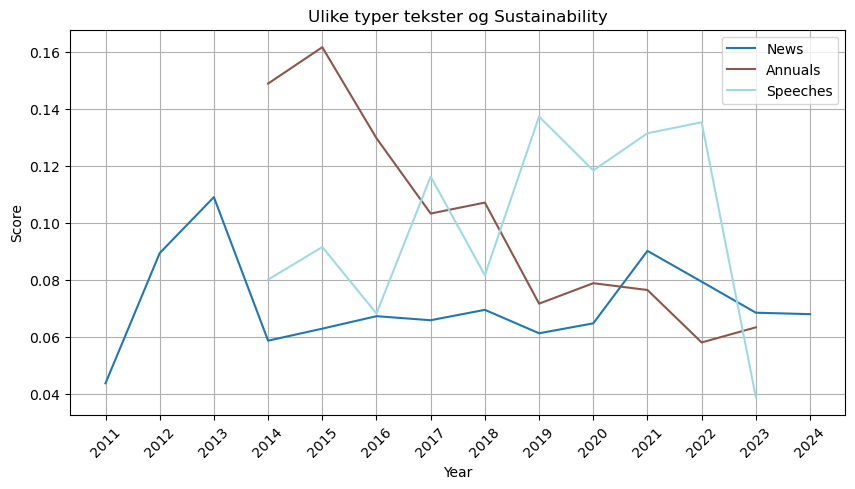

In [51]:
# Define the colors and labels for each company
num_companies = len(plot_data)
colors = cm.tab20(np.linspace(0, 1, num_companies))
labels = list(plot_data.keys())

plt.figure(figsize=(10, 5))
plt.title(f'Ulike typer tekster og {centroid}')
plt.xlabel('Year')
plt.ylabel('Score')
plt.grid(True)

# Plot the scores for each company
for i, (company, color) in enumerate(zip(plot_data.keys(), colors)):
    plt.plot(years[company], plot_data[company], color=color, label=company)

# Customize x-axis ticks to show all years
plt.xticks(all_years, rotation=45)

# Show legend
plt.legend()

# Show the plot
plt.show()